# Merged model evaluation

In [2]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.functional_profiles as fp
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy import stats
import glob
import numpy as np




/Users/callithrix/Documents/Projects/Functional_Fusion/code/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
files = sorted(
    glob.glob(f'{ut.model_dir}//Models/Evaluation/nettekoven_68/eval_on-task*_existing.tsv'))

# files = ['eval_on-task+rest_existing.tsv', 'eval_on-tseries_existing.tsv']

list_of_dfs = []
for f, file in enumerate(files):
    t = pd.read_csv(f'{file}', delimiter='\t')
    list_of_dfs.append(t)
    t['source'] = file.split('/')[-1].strip('.tsv')

D = pd.concat(list_of_dfs, ignore_index=True).reset_index(drop=True)
D.drop_duplicates(subset=D.columns.difference(['source']))

D.shape

(1266, 6)

### Import the timeseries evaluation and average across sessions (ses-rest1 and ses-rest2)

In [4]:
# Average across sessions for each subject
files = sorted(
    glob.glob(f'{ut.model_dir}//Models/Evaluation/nettekoven_68/eval_on-tseries*existing.tsv'))
list_of_dfs = []
for f, file in enumerate(files):
    t = pd.read_csv(
        f'{file}', delimiter='\t')
    list_of_dfs.append(t)
    t['source'] = file.split('/')[-1].strip('.tsv')

Tseries = pd.concat(list_of_dfs, ignore_index=True).reset_index(drop=True)
Tseries['source'] = files[-1].split('/')[-1].strip('.tsv')
Tseries[Tseries.subj_num==99]


,fit_type,model_name,test_data,subj_num,dcbc,test_sess,source
1188,Models_03,asym_Md_space-MNISymC3_K-10,HCP-Tseries,99,-0.027428,ses-rest1,eval_on-tseries_existing
1189,NaN,atl-Anatom_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.009514,ses-rest1,eval_on-tseries_existing
1190,NaN,atl-MDTB10_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.023905,ses-rest1,eval_on-tseries_existing
1191,NaN,atl-Buckner7_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.012965,ses-rest1,eval_on-tseries_existing
1192,NaN,atl-Buckner17_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.012124,ses-rest1,eval_on-tseries_existing
1193,NaN,atl-Ji10_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.008916,ses-rest1,eval_on-tseries_existing
1194,Models_03,asym_Md_space-MNISymC3_K-10,HCP-Tseries,99,-0.030226,ses-rest2,eval_on-tseries_existing
1195,NaN,atl-Anatom_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.002562,ses-rest2,eval_on-tseries_existing
1196,NaN,atl-MDTB10_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.031320,ses-rest2,eval_on-tseries_existing
1197,NaN,atl-Buckner7_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.006430,ses-rest2,eval_on-tseries_existing


In [5]:
# Create new dataframe averaged across sessions (ses-rest1 and ses-rest2)
Tseries_avg = Tseries[Tseries.test_sess=='ses-rest1']
Tseries_avg['dcbc'] = Tseries.groupby(
    ['subj_num', 'model_name']).mean().reset_index().dcbc.values
Tseries_avg['test_sess'] = 'all'

# Average across sessions for each subject
Tseries.groupby(['subj_num', 'model_name']).mean()
# Add average across sessions to the rest of the data
D = pd.concat([D, Tseries_avg], ignore_index=True).reset_index(drop=True)

D.fit_type.iloc[-1]

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_43630/2751858737.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Tseries_avg['dcbc'] = Tseries.groupby(
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_43630/2751858737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tseries_avg['dcbc'] = Tseries.groupby(
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_43630/2751858737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

nan

In [6]:
D.head()


,fit_type,model_name,test_data,subj_num,dcbc,source,test_sess
0,Models_03,asym_Md_space-MNISymC3_K-10,MDTB,0,0.098281,eval_on-task+rest_existing,NaN
1,Models_03,asym_Md_space-MNISymC3_K-10,MDTB,1,0.095214,eval_on-task+rest_existing,NaN
2,Models_03,asym_Md_space-MNISymC3_K-10,MDTB,2,0.049849,eval_on-task+rest_existing,NaN
3,Models_03,asym_Md_space-MNISymC3_K-10,MDTB,3,0.213206,eval_on-task+rest_existing,NaN
4,Models_03,asym_Md_space-MNISymC3_K-10,MDTB,4,0.090611,eval_on-task+rest_existing,NaN


In [7]:
D.tail()


,fit_type,model_name,test_data,subj_num,dcbc,source,test_sess
1861,NaN,atl-Anatom_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.006038,eval_on-tseries_existing,all
1862,NaN,atl-MDTB10_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.005760,eval_on-tseries_existing,all
1863,NaN,atl-Buckner7_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.009697,eval_on-tseries_existing,all
1864,NaN,atl-Buckner17_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.008749,eval_on-tseries_existing,all
1865,NaN,atl-Ji10_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.027612,eval_on-tseries_existing,all


In [8]:
crits = ['dcbc_group','dcbc_indiv']

figsize = (10,10)
# Determine origin of model: clustered_in_C3 (and then refitted to C2), clustered (on C2 or C3 data, but not refitted to another space), data (pure data-driven model)
for r,row in D.iterrows():
    model_parts = row.model_name.split('_')
    space = row.model_name.split('space-')[1].strip('_')
    train_data = row.model_name.split('_space')[0]
    D.loc[r, 'atlas'] = space
    D.loc[r, 'train_data'] = train_data

# Determine whether model was trained on rest, task and rest, or task only
for r,row in D.iterrows():

    if 'atl-Anatom' == row['train_data']:
        D.loc[r, 'trained_on'] = 'anatomy'
    elif row['train_data'] in ['atl-Buckner7', 'atl-Buckner17', 'atl-Ji10']:
        D.loc[r, 'trained_on'] = 'rest'
    else:
        D.loc[r, 'trained_on'] = 'task'
        

# Determine whether model was tested on rest, task and rest, or task only
for r, row in D.iterrows():
    if 'HCP' == row['test_data']:
        D.loc[r, 'tested_on'] = 'rest'
    elif 'HCP-Tseries' == row['test_data']:
        D.loc[r, 'tested_on'] = 'tseries'
    else:
        D.loc[r, 'tested_on'] = 'task'


D.tail()


,fit_type,model_name,test_data,subj_num,dcbc,source,test_sess,atlas,train_data,trained_on,tested_on
1861,NaN,atl-Anatom_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.006038,eval_on-tseries_existing,all,MNI152NLin2009cSymC_dseg,atl-Anatom,anatomy,tseries
1862,NaN,atl-MDTB10_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.005760,eval_on-tseries_existing,all,MNI152NLin2009cSymC_dseg,atl-MDTB10,task,tseries
1863,NaN,atl-Buckner7_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.009697,eval_on-tseries_existing,all,MNI152NLin2009cSymC_dseg,atl-Buckner7,rest,tseries
1864,NaN,atl-Buckner17_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.008749,eval_on-tseries_existing,all,MNI152NLin2009cSymC_dseg,atl-Buckner17,rest,tseries
1865,NaN,atl-Ji10_space-MNI152NLin2009cSymC_dseg,HCP-Tseries,99,-0.027612,eval_on-tseries_existing,all,MNI152NLin2009cSymC_dseg,atl-Ji10,rest,tseries


### Comparing pure task-trained, rest-and-task-trained, and rest-trained parcellations

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_43630/1561304122.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  D.groupby(['train_data']).mean()


,subj_num,dcbc
train_data,,
asym_Md,35.688103,0.063012
atl-Anatom,35.688103,0.036641
atl-Buckner17,35.688103,0.078940
atl-Buckner7,35.688103,0.075987
atl-Ji10,35.688103,0.076759
atl-MDTB10,35.688103,0.057746


<Figure size 1000x1000 with 0 Axes>

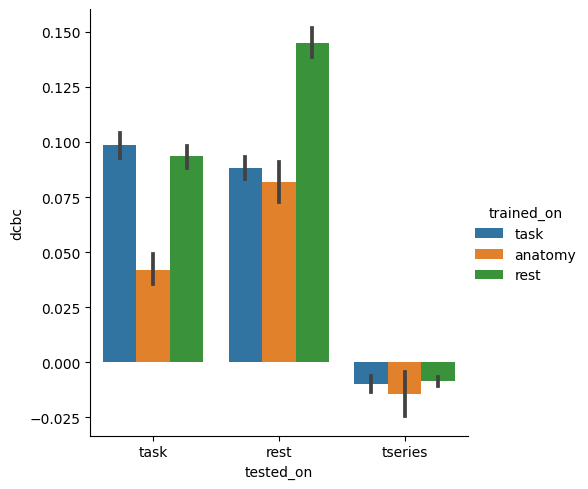

In [9]:

plt.figure(figsize=figsize)
sb.catplot(
    data=D, x="tested_on", y="dcbc", hue="trained_on", kind="bar")

D.groupby(['train_data']).mean()


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_43630/2653598859.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  D.groupby(['train_data', 'tested_on']).mean()


subj_num      dcbc
train_data    tested_on                     
asym_Md       rest       49.500000  0.087144
              task       10.801802  0.097556
              tseries    49.500000  0.000535
atl-Anatom    rest       49.500000  0.081801
              task       10.801802  0.041868
              tseries    49.500000 -0.014321
atl-Buckner17 rest       49.500000  0.145702
              task       10.801802  0.097257
              tseries    49.500000 -0.008154
atl-Buckner7  rest       49.500000  0.142929
              task       10.801802  0.095579
              tseries    49.500000 -0.012700
atl-Ji10      rest       49.500000  0.146580
              task       10.801802  0.087383
              tseries    49.500000 -0.004856
atl-MDTB10    rest       49.500000  0.089165
              task       10.801802  0.099298
              tseries    49.500000 -0.019796

<Figure size 1000x1000 with 0 Axes>

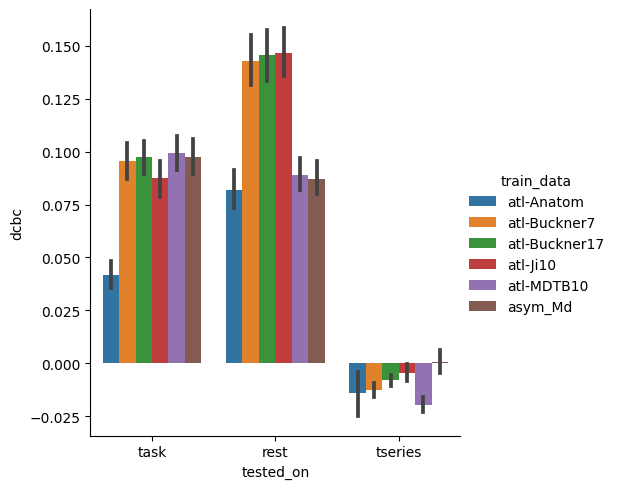

In [10]:

plt.figure(figsize=figsize)
sb.catplot(
    data=D, x="tested_on", y="dcbc", hue="train_data", kind="bar", hue_order=['atl-Anatom', 'atl-Buckner7', 'atl-Buckner17', 'atl-Ji10', 'atl-MDTB10', 'asym_Md'])

D.groupby(['train_data', 'tested_on']).mean()


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_43630/1398510353.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Davg = D.groupby(
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_43630/1398510353.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Davg.groupby(['tested_on', 'train_data']).mean()


subj_num      dcbc
tested_on train_data                        
rest      asym_Md        49.500000  0.087144
          atl-Anatom     49.500000  0.081801
          atl-Buckner17  49.500000  0.145702
          atl-Buckner7   49.500000  0.142929
          atl-Ji10       49.500000  0.146580
          atl-MDTB10     49.500000  0.089165
task      asym_Md         7.428571  0.084588
          atl-Anatom      7.428571  0.046163
          atl-Buckner17   7.428571  0.084007
          atl-Buckner7    7.428571  0.079319
          atl-Ji10        7.428571  0.069248
          atl-MDTB10      7.428571  0.086119
tseries   asym_Md        49.500000  0.000535
          atl-Anatom     49.500000 -0.014321
          atl-Buckner17  49.500000 -0.008154
          atl-Buckner7   49.500000 -0.012700
          atl-Ji10       49.500000 -0.004856
          atl-MDTB10     49.500000 -0.019796

<Figure size 1000x1000 with 0 Axes>

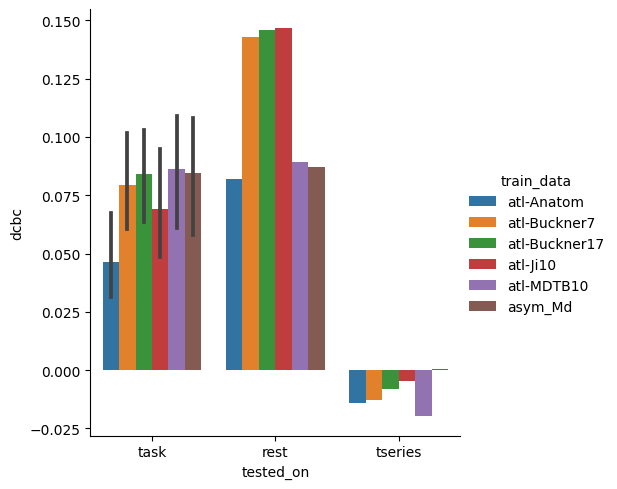

In [16]:
Davg = D.groupby(
    ['atlas', 'model_name', 'test_data', 'train_data', 'tested_on']).mean().reset_index()



plt.figure(figsize=figsize)
sb.catplot(
    data=Davg, x="tested_on", y="dcbc", hue="train_data", kind="bar", hue_order=['atl-Anatom', 'atl-Buckner7', 'atl-Buckner17', 'atl-Ji10', 'atl-MDTB10', 'asym_Md'])

Davg.groupby(['tested_on', 'train_data']).mean()


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_37552/3095851841.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  D.groupby(['train_data']).mean()


,subj_num,dcbc
train_data,,
asym_Md,39.048662,0.047810
atl-Anatom,39.048662,0.024242
atl-Buckner17,39.048662,0.057749
atl-Buckner7,39.048662,0.054409
atl-Ji10,39.048662,0.056901
atl-MDTB10,39.048662,0.038879


<Figure size 1000x1000 with 0 Axes>

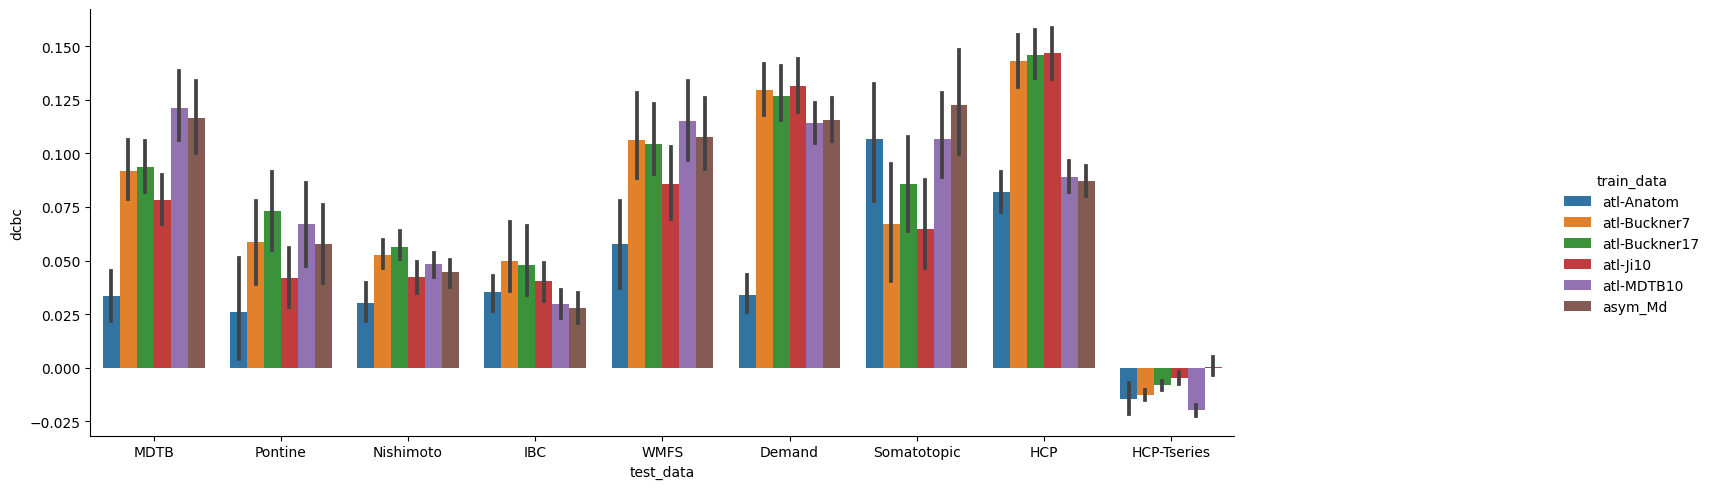

In [ ]:

plt.figure(figsize=figsize)
g = sb.catplot(
    data=D, x="test_data", y="dcbc", hue="train_data", kind="bar", hue_order=['atl-Anatom', 'atl-Buckner7', 'atl-Buckner17', 'atl-Ji10', 'atl-MDTB10', 'asym_Md'])
g.fig.set_size_inches(20, 5)

D.groupby(['train_data']).mean()


# Only plot timeseries evaluation

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_37552/1711733672.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  D.groupby(['train_data', 'tested_on']).mean()


subj_num      dcbc
train_data    tested_on                     
asym_Md       rest       49.500000  0.087144
              task       10.801802  0.097556
              tseries    49.500000  0.000535
atl-Anatom    rest       49.500000  0.081801
              task       10.801802  0.041868
              tseries    49.500000 -0.014321
atl-Buckner17 rest       49.500000  0.145702
              task       10.801802  0.097257
              tseries    49.500000 -0.008154
atl-Buckner7  rest       49.500000  0.142929
              task       10.801802  0.095579
              tseries    49.500000 -0.012700
atl-Ji10      rest       49.500000  0.146580
              task       10.801802  0.087383
              tseries    49.500000 -0.004856
atl-MDTB10    rest       49.500000  0.089165
              task       10.801802  0.099298
              tseries    49.500000 -0.019796

<Figure size 1000x1000 with 0 Axes>

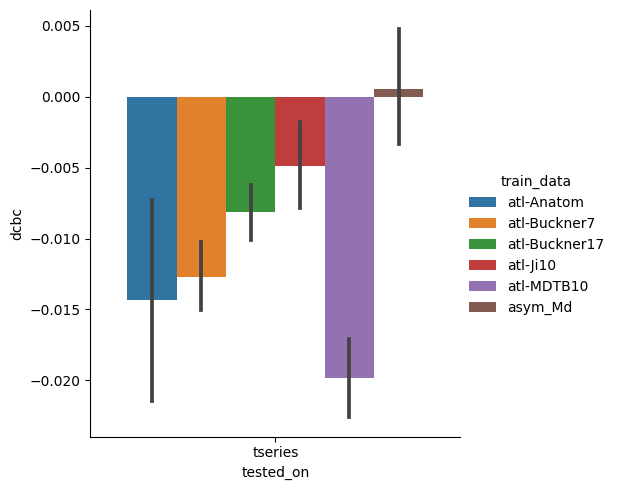

In [ ]:

plt.figure(figsize=figsize)
sb.catplot(
    data=D[D.test_data=='HCP-Tseries'], x="tested_on", y="dcbc", hue="train_data", kind="bar", hue_order=['atl-Anatom', 'atl-Buckner7', 'atl-Buckner17', 'atl-Ji10', 'atl-MDTB10', 'asym_Md'])

D.groupby(['train_data', 'tested_on']).mean()


In [106]:
# Import new data
files = sorted(
    glob.glob(f'{ut.model_dir}//Models/Evaluation/nettekoven_68/eval_on-tseries_sym*.tsv'))
list_of_dfs = []
for f, file in enumerate(files):
    t = pd.read_csv(
        f'{file}', delimiter='\t')
    list_of_dfs.append(t)
    t['source'] = file.split('/')[-1].strip('.tsv')

Tseries = pd.concat(list_of_dfs, ignore_index=True).reset_index(drop=True)
Tseries['source'] = files[-1].split('/')[-1].strip('.tsv')
Tseries[Tseries.subj_num == 99]

Tseries
# # Create new dataframe averaged across sessions (ses-rest1 and ses-rest2)
Tseries_avg = Tseries[Tseries.test_sess == 'ses-rest1']
Tseries_avg['dcbc_group'] = Tseries.groupby(
    ['subj_num', 'model_name', 'K']).mean().reset_index().dcbc_group.values
Tseries_avg['dcbc_indiv'] = Tseries.groupby(
    ['subj_num', 'model_name', 'K']).mean().reset_index().dcbc_indiv.values
Tseries_avg['test_sess'] = 'all'

# # Average across sessions for each subject
# Tseries.groupby(['subj_num', 'model_name']).mean()
# # Add average across sessions to the rest of the data



/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_37552/1621430946.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Tseries_avg['dcbc_group'] = Tseries.groupby(


ValueError: Length of values (200) does not match length of index (20200)

In [107]:
Tseries.head()

,model_name,atlas,K,train_data,train_loglik,subj_num,common_kappa,dcbc_group,dcbc_indiv,model_type,test_sess,indivtrain_ind,indivtrain_val,test_data,source
0,sym_MdPoNiIbWmDeSo,MNISymC3,10,"['MDTB', 'Pontine', 'Nishimoto', 'IBC', 'WMFS'...",18011592.0,0,True,0.001331,0.001331,Models_03,ses-rest1,half,1,HCP-Tseries,eval_on-tseries_sym_MdPoNiIbWmDeSo_space-MNISy...
1,sym_MdPoNiIbWmDeSo,MNISymC3,10,"['MDTB', 'Pontine', 'Nishimoto', 'IBC', 'WMFS'...",18011592.0,0,True,0.004131,0.004131,Models_03,ses-rest2,half,1,HCP-Tseries,eval_on-tseries_sym_MdPoNiIbWmDeSo_space-MNISy...
2,sym_MdPoNiIbWmDeSo,MNISymC3,10,"['MDTB', 'Pontine', 'Nishimoto', 'IBC', 'WMFS'...",18011592.0,0,True,0.001331,0.001331,Models_03,ses-rest1,half,1,HCP-Tseries,eval_on-tseries_sym_MdPoNiIbWmDeSo_space-MNISy...
3,sym_MdPoNiIbWmDeSo,MNISymC3,10,"['MDTB', 'Pontine', 'Nishimoto', 'IBC', 'WMFS'...",18011592.0,0,True,0.004131,0.004131,Models_03,ses-rest2,half,1,HCP-Tseries,eval_on-tseries_sym_MdPoNiIbWmDeSo_space-MNISy...
4,sym_MdPoNiIbWmDeSo,MNISymC3,10,"['MDTB', 'Pontine', 'Nishimoto', 'IBC', 'WMFS'...",18011592.0,1,True,-0.001552,-0.001552,Models_03,ses-rest1,half,1,HCP-Tseries,eval_on-tseries_sym_MdPoNiIbWmDeSo_space-MNISy...


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_37552/1670808721.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Tseries.groupby(['train_data', 'test_data']).mean()


,,K,train_loglik,subj_num,common_kappa,dcbc_group,dcbc_indiv,indivtrain_val
train_data,test_data,,,,,,,
"['MDTB', 'Pontine', 'Nishimoto', 'IBC', 'WMFS', 'Demand', 'Somatotopic']",HCP-Tseries,15.0,18497729.0,33.0,1.0,0.00308,0.00308,1.5


<Figure size 1000x1000 with 0 Axes>

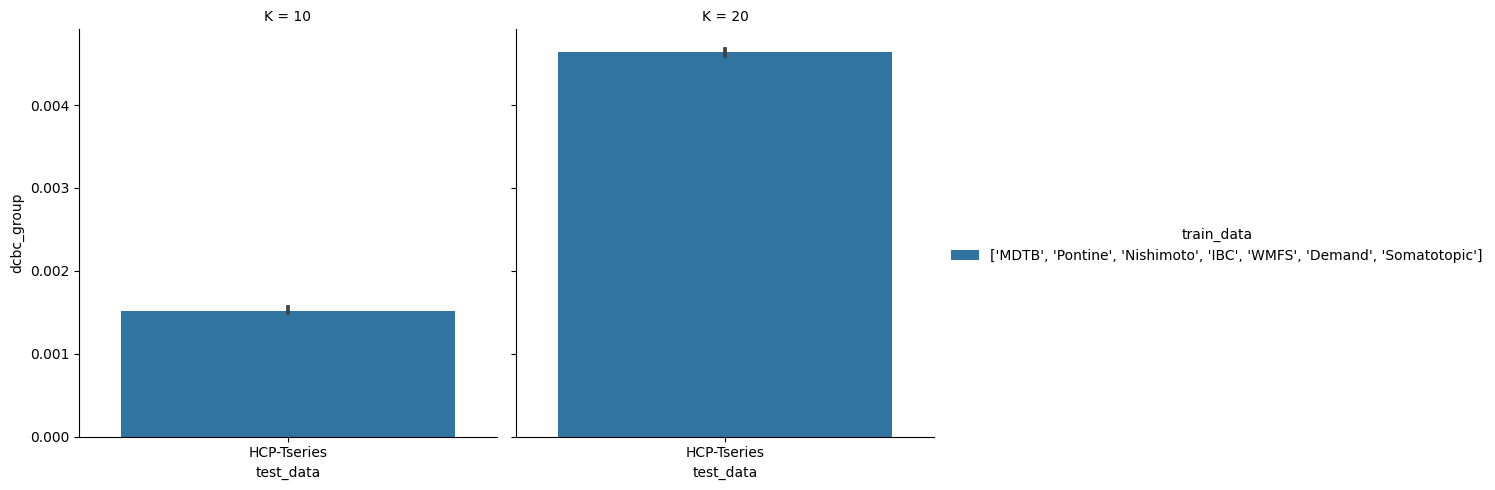

In [104]:

plt.figure(figsize=figsize)
sb.catplot(
    data=Tseries, x="test_data", col="K", y="dcbc_group", hue="train_data", kind="bar")

Tseries.groupby(['train_data', 'test_data']).mean()
